## TODO:

1. incorporate `PrettyDuration` into `JagularFileMap` and update `__repr__` [DONE!]
1. split out `pairwise` and `is_sorted` to `utils` [DONE!]
1. fix issue of `header_size`
1. fix test data [DONE!]
1. write actual utiity function to return data and/or list of required files
1. finish `NotImplementedError` functions
1. deal with duplicates, and overlaps
1. consider graceful abort?
1. FFB! Provide way to request specific channel(s) and provide for inter-file interpolation (default should maybe return all channels?)
1. ...?

In [34]:
import struct
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
import jagular as jag

In [36]:
file_list = ['../sample_data/sample_data_1.rec',
             '../sample_data/sample_data_3.rec',
             '../sample_data/sample_data_4.rec',
             '../sample_data/sample_data_5.rec',
             '../sample_data/sample_data_2.rec'
            ]

jfm = jag.io.JagularFileMap(file_list)

print(jfm)

<JagularFileMap: 5 files spanning 9:45:54:849 hours (missing 52:19:480 minutes)> at 0x7fbf5653bb70


In [37]:
ch_out_prefix = '2017-05-31_16-11-39_'
n_chan_zfill = len(str(jfm._reader.n_spike_channels))
ch_out_files = [ch_out_prefix + 'ch.' + str(n).zfill(n_chan_zfill) + '.raw' for n in range(jfm._reader.n_spike_channels)]
# print(ch_out_files)

In [38]:
#TODO: make filenames configurable
#TODO: warn if files already exist, or if we cannot create them (this latter one should be handled automatically)

from contextlib import ExitStack

with ExitStack() as stack:
    ts_file = stack.enter_context(open('timestamps.raw', 'wb+'))
    ch_files = [stack.enter_context(open(fname, 'wb+')) for fname in ch_out_files]
    
    for ii, (ts, all_ch_data) in enumerate(jfm.read_stitched_files(block_size=4)):
        num_packets = len(ts)

        my_ts_struct = struct.Struct('<%dI' % num_packets)
        my_ch_struct = struct.Struct('<%dh' % num_packets)
        ts_packed = my_ts_struct.pack(*ts)
        for ch in range(jfm._reader.n_spike_channels):
            ch_packed = my_ch_struct.pack(*all_ch_data[ch,:])
            # write current channel data of current block to file:
            ch_files[ch].write(ch_packed)
            
        # write timestamps of current block to file:
        ts_file.write(ts_packed)       


In [88]:
# now try to read back some data:

ts_from_file = np.fromfile('timestamps.raw', dtype=np.uint32)

In [89]:
ts_from_file

array([    200917,   55205700,   55205701,   55205702,   55205703,
         55205704,   55205705,   55205706,   55205707,   55205708,
        190383308,  216003235,   45380179,   45380180,   45380181,
         45380182,   45380183,   45380184,   45380185,   45380186,
         45380187,  430419684,  428619684,   55912384,   55912385,
         55912386,   55912387,   55912388,   55912389,   55912390,
         55912391,   55912392,  617928812,  648279793,   23871545,
         23871546,   23871547,   23871548,   23871549,   23871550,
         23871551,   23871552,   23871553,  824383837,  864397337,
         23104817,   23104818,   23104819,   23104820,   23104821,
         23104822,   23104823,   23104824,   23104825, 1054846413], dtype=uint32)

In [90]:
for ii, (ts, ch_data) in enumerate(jfm.read_stitched_files(block_size=5)):
    print(ii, ts)

0 [200917, 55205700, 55205701, 55205702, 55205703]
1 [55205704, 55205705, 55205706, 55205707, 55205708]
2 [190383308, 216003235, 45380179, 45380180, 45380181]
3 [45380182, 45380183, 45380184, 45380185, 45380186]
4 [45380187, 430419684, 428619684, 55912384, 55912385]
5 [55912386, 55912387, 55912388, 55912389, 55912390]
6 [55912391, 55912392, 617928812, 648279793, 23871545]
7 [23871546, 23871547, 23871548, 23871549, 23871550]
8 [23871551, 23871552, 23871553, 824383837, 864397337]
9 [23104817, 23104818, 23104819, 23104820, 23104821]
10 [23104822, 23104823, 23104824, 23104825, 1054846413]


In [45]:
import struct

ch = 5

ch_data = all_ch_data[ch,:]  # get a 1-D array of numbers
arrSize = len(ch_data)

my_struct = struct.Struct('<%dh' % arrSize)

# packed = struct.pack('<iiHHi%df' % arrSize,
#     nSamples, nSampPeriod, nSampSize, nParmKind, arrSize, *flattened)

In [ ]:
flattened = npVect.ravel()  # get a 1-D array of numbers
arrSize = len(flattened)
# pack header, count of numbers, and numbers, all in one call
packed = struct.pack('<iiHHi%df' % arrSize,
    nSamples, nSampPeriod, nSampSize, nParmKind, arrSize, *flattened)

In [16]:
from contextlib import ExitStack

with ExitStack() as stack:
    files = [stack.enter_context(open(fname, 'wb+')) for fname in ch_out_files]
    
    
    flattened = npVect.ravel()  # get a 1-D array of numbers
arrSize = len(flattened)
# pack header, count of numbers, and numbers, all in one call
packed = struct.pack('<iiHHi%df' % arrSize,
    nSamples, nSampPeriod, nSampSize, nParmKind, arrSize, *flattened)

['ch.0000.raw',
 'ch.0001.raw',
 'ch.0002.raw',
 'ch.0003.raw',
 'ch.0004.raw',
 'ch.0005.raw',
 'ch.0006.raw',
 'ch.0007.raw',
 'ch.0008.raw',
 'ch.0009.raw',
 'ch.0010.raw',
 'ch.0011.raw',
 'ch.0012.raw',
 'ch.0013.raw',
 'ch.0014.raw',
 'ch.0015.raw',
 'ch.0016.raw',
 'ch.0017.raw',
 'ch.0018.raw',
 'ch.0019.raw',
 'ch.0020.raw',
 'ch.0021.raw',
 'ch.0022.raw',
 'ch.0023.raw',
 'ch.0024.raw',
 'ch.0025.raw',
 'ch.0026.raw',
 'ch.0027.raw',
 'ch.0028.raw',
 'ch.0029.raw',
 'ch.0030.raw',
 'ch.0031.raw',
 'ch.0032.raw',
 'ch.0033.raw',
 'ch.0034.raw',
 'ch.0035.raw',
 'ch.0036.raw',
 'ch.0037.raw',
 'ch.0038.raw',
 'ch.0039.raw',
 'ch.0040.raw',
 'ch.0041.raw',
 'ch.0042.raw',
 'ch.0043.raw',
 'ch.0044.raw',
 'ch.0045.raw',
 'ch.0046.raw',
 'ch.0047.raw',
 'ch.0048.raw',
 'ch.0049.raw',
 'ch.0050.raw',
 'ch.0051.raw',
 'ch.0052.raw',
 'ch.0053.raw',
 'ch.0054.raw',
 'ch.0055.raw',
 'ch.0056.raw',
 'ch.0057.raw',
 'ch.0058.raw',
 'ch.0059.raw',
 'ch.0060.raw',
 'ch.0061.raw',
 'ch.006

In [6]:

for ii, (ts, ch_data) in enumerate(jfm.read_stitched_files(block_size=5)):
    print(ii, ts)

0 [200917, 55205700, 55205701, 55205702, 55205703]
1 [55205704, 55205705, 55205706, 55205707, 55205708]
2 [190383308, 216003235, 45380179, 45380180, 45380181]
3 [45380182, 45380183, 45380184, 45380185, 45380186]
4 [45380187, 430419684, 428619684, 55912384, 55912385]
5 [55912386, 55912387, 55912388, 55912389, 55912390]
6 [55912391, 55912392, 617928812, 648279793, 23871545]
7 [23871546, 23871547, 23871548, 23871549, 23871550]
8 [23871551, 23871552, 23871553, 824383837, 864397337]
9 [23104817, 23104818, 23104819, 23104820, 23104821]
10 [23104822, 23104823, 23104824, 23104825, 1054846413]


In [28]:
jag.io.JagularFileMap('../sample_data/sample_data_1.rec')

<JagularFileMap: 1 files spanning 1:45:39:413 hours (missing 0.0 milliseconds)> at 0x1f92107c278

In [29]:
jfm.timestamps

array([[  6.69723333e+00,   6.34611027e+03],
       [  7.20010783e+03,   1.43473228e+04],
       [  1.42873228e+04,   2.05976271e+04],
       [  2.16093264e+04,   2.74794612e+04],
       [  2.88132446e+04,   3.51615471e+04]])

In [30]:
jfm.timesamples

array([[    200917,  190383308],
       [ 216003235,  430419684],
       [ 428619684,  617928812],
       [ 648279793,  824383837],
       [ 864397337, 1054846413]])

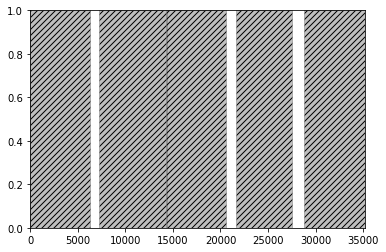

In [31]:
ax = jfm.plot()
# ax.set_xlim(0, 300);

In [32]:
jfm._samples_within_bounds(2853122, 7093204 )

True

In [33]:
jfm._time_within_bounds(100, 250)

True

In [34]:
print("duration including gaps: {}".format(jfm.duration_w_gaps))
print("duration excluding gaps: {}".format(jfm.duration_wo_gaps))

duration including gaps: 9:45:54:849 hours
duration excluding gaps: 8:53:35:369 hours


In [83]:
from contextlib import ExitStack

with open('test1', 'w') as f:
    f.write('f1b1f1b2f1b3f1b4')
    
with open('test2', 'w') as f:
    f.write('f2b1f2b2f2b3f2b4')
    
with open('test3', 'w') as f:
    f.write('f3b1f3b2')
    
with open('test4', 'w') as f:
    f.write('f4b1f4b2f4b3f4b4f4b5')
    
filenames = ['test1', 'test2', 'test3', 'test4']

from contextlib import ExitStack

def read_stitched_files(nch=2):
    with ExitStack() as stack:
        files = [stack.enter_context(open(fname, 'r')) for fname in filenames]
        ii=0
        while True:
            try:
                chunk = files[ii].read(4*nch)
                if 0 < len(chunk) < 4*nch:
                    # chunk size could not be filled from current file, so move onto next file
                    ii+=1
                    chunkB = files[ii].read(4*int(nch-len(chunk)/4))
                    chunk = chunk + chunkB
                if chunk:
                    yield chunk
                else:
                    ii+=1
            except IndexError:
                return
                       
for chunk in read_stitched_files(3):
    print(chunk)

f1b1f1b2f1b3
f1b4f2b1f2b2
f2b3f2b4f3b1
f3b2f4b1f4b2
f4b3f4b4f4b5


In [82]:
with open('test1', 'w') as f:
    f.write('f1b1f1b2f1b3f1b4')
with open('test2', 'w') as f:
    f.write('f2b1f2b2f2b3f2b4')
with open('test3', 'w') as f:
    f.write('f3b1f3b2')   
with open('test4', 'w') as f:
    f.write('f4b1f4b2f4b3f4b4f4b5')

print('')
print('One symbol at a time:')
print('=======================')
for chunk in read_stitched_files(1):
    print(chunk)
    
print('')
print('Two symbols at a time:')
print('=======================')
for chunk in read_stitched_files(2):
    print(chunk)
    
print('')
print('Three symbols at a time:')
print('=======================')
for chunk in read_stitched_files(3):
    print(chunk)
    
print('')
print('Four symbols at a time:')
print('=======================')
for chunk in read_stitched_files(4):
    print(chunk)
    
print('')
print('Five symbols at a time:')
print('=======================')
for chunk in read_stitched_files(5):
    print(chunk)
    
print('')
print('Six symbols at a time:')
print('=======================')
for chunk in read_stitched_files(6):
    print(chunk)


One symbol at a time:
f1b1
f1b2
f1b3
f1b4
f2b1
f2b2
f2b3
f2b4
f3b1
f3b2
f4b1
f4b2
f4b3
f4b4
f4b5

Two symbols at a time:
f1b1f1b2
f1b3f1b4
f2b1f2b2
f2b3f2b4
f3b1f3b2
f4b1f4b2
f4b3f4b4

Three symbols at a time:
f1b1f1b2f1b3
f1b4f2b1f2b2
f2b3f2b4f3b1
f3b2f4b1f4b2
f4b3f4b4f4b5

Four symbols at a time:
f1b1f1b2f1b3f1b4
f2b1f2b2f2b3f2b4
f3b1f3b2f4b1f4b2

Five symbols at a time:
f1b1f1b2f1b3f1b4f2b1
f2b2f2b3f2b4f3b1f3b2
f4b1f4b2f4b3f4b4f4b5

Six symbols at a time:
f1b1f1b2f1b3f1b4f2b1f2b2
f2b3f2b4f3b1f3b2
